<a href="https://colab.research.google.com/github/sraghav42/machine_learning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Save original test images for display purposes
orig_test = x_test
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


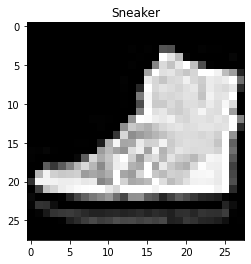

In [63]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title(class_names[y_test[index]])
plt.show()


In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.6

In [65]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5668 - accuracy: 0.7996 - val_loss: 0.3605 - val_accuracy: 0.8693
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3839 - accuracy: 0.8634 - val_loss: 0.3052 - val_accuracy: 0.8889
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3295 - accuracy: 0.8813 - val_loss: 0.2808 - val_accuracy: 0.8957
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2999 - accuracy: 0.8919 - val_loss: 0.2556 - val_accuracy: 0.9064
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2738 - accuracy: 0.9009 - val_loss: 0.2469 - val_accuracy: 0.9116
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2545 - accuracy: 0.9063 - val_loss: 0.2509 - val_accuracy: 0.9084
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2427 - accuracy: 0.9107 - val_loss: 0.2334 - val_accuracy: 0.9157
Epoch 

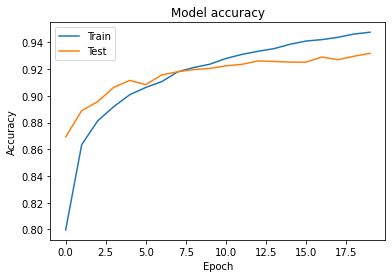

In [70]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

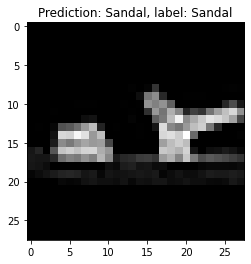

In [79]:
index = random.randrange(10000)
plt.title('Prediction: %s, label: %s' % (class_names[most_likely[index]], class_names[y_test[index]]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

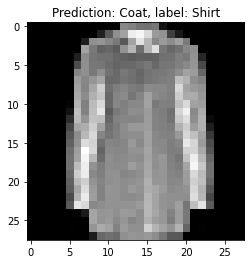

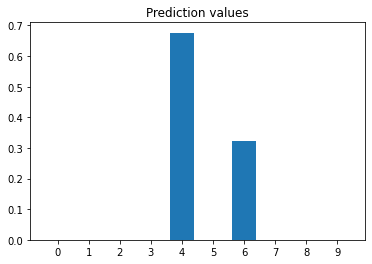

In [85]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %s, label: %s' % (class_names[most_likely[index]], class_names[y_test[index]]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()